# <b>Time Series Project for checking Air quality</b>

### <b> Introduction </b>
<p> A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.
Time series forecasting is the use of a model to predict future values based on previously observed values.</p>
<p> This project is to project the relative humidity (%) in a Italian city.</p>
<p> The dataset contains the responses of a gas multisensor device deployed on the field in a significantly polluted area, at road level,within an Italian city.Hourly responses averages are recorded along with gas concentrations references from a certified analyzer.Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. </p>
<p> Even though gas concentrations are mentioned in dataset we will be using on RH column for our project. Missing values are marked as -200 here.

### <b>Data Section</b>
<li> Date :(DD/MM/YYYY)
<li> Time :(HH.MM.SS)
<li> RH: Relative Humidity (%)


### <b>Importing Dataset and basic libraries

In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [ ]:
import seaborn as sns
from datetime import datetime, time
from datetime import timedelta

In [ ]:
# Now, we can use pandas read_excel after installing the excel importer.
!pip install -q xlrd
!pip install --upgrade xlrd

In [ ]:
#reading file from local computer
from google.colab import files
uploaded = files.upload()

Saving AirQualityUCI.xlsx to AirQualityUCI (1).xlsx


In [ ]:
import io
df = pd.read_excel(io.BytesIO(uploaded['AirQualityUCI.xlsx']))

In [ ]:
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


In [ ]:
df = df.iloc[:,[0,1,13]]
df.head()

,Date,Time,RH
0,2004-03-10,18:00:00,48.875001
1,2004-03-10,19:00:00,47.700000
2,2004-03-10,20:00:00,53.975000
3,2004-03-10,21:00:00,60.000000
4,2004-03-10,22:00:00,59.575001


In [ ]:
#Merging date and time column to make it datetime format
df['DateTime'] = pd.to_datetime(df.Date.astype(str) + ' ' + df.Time.astype(str))

In [ ]:
#Removing Date and Time columns
df = df.drop(['Date','Time'],axis=1)

In [ ]:
df.head(2)

,RH,DateTime
0,48.875001,2004-03-10 18:00:00
1,47.700000,2004-03-10 19:00:00


In [ ]:
df.dtypes

RH                 float64
DateTime    datetime64[ns]
dtype: object

In [ ]:
df.index = df['DateTime']

In [ ]:
df = df.drop(['DateTime'],axis=1)

In [ ]:
df.head(2)

,RH
DateTime,
2004-03-10 18:00:00,48.875001
2004-03-10 19:00:00,47.700000


Replacing missing values with the values from previous row  

In [ ]:
#missing value treatment
cols = df.columns
for j in cols:
    for i in range(0,len(df)):
       if df[j][i] == -200:
           df[j][i] = df[j][i-1]

### <b>Data Visualization 

In [ ]:
sns.set()

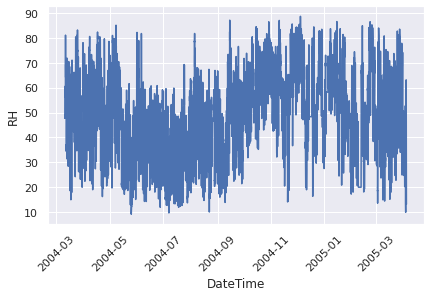

In [ ]:
plt.ylabel('RH')
plt.xlabel('DateTime')
plt.xticks(rotation=45)

plt.plot(df.index, df['RH'], )

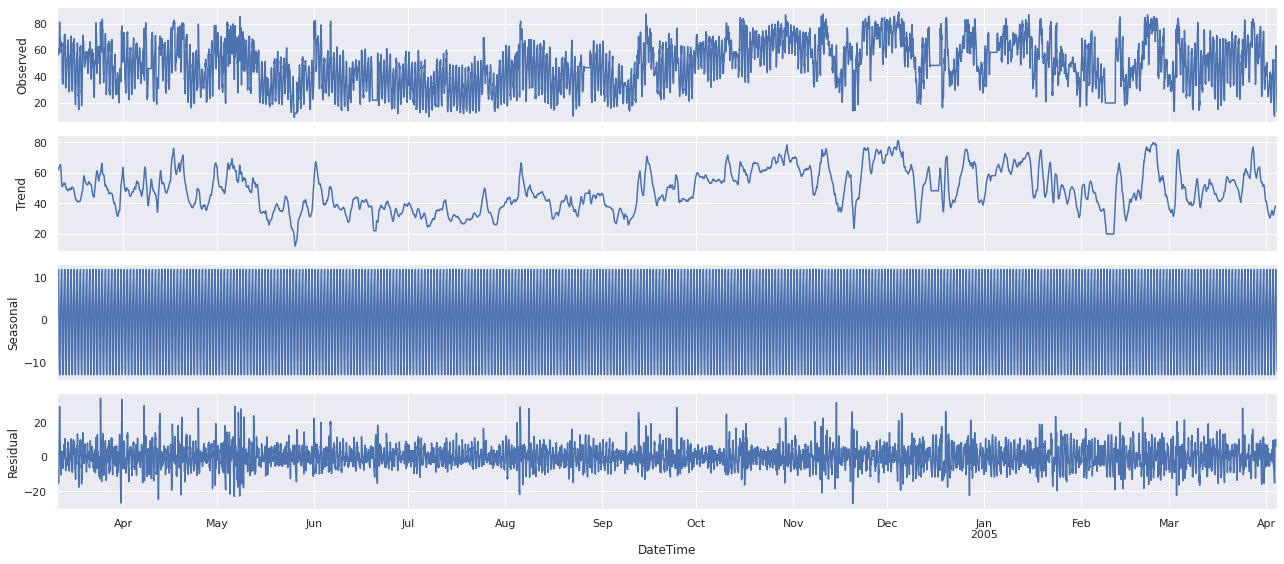

In [ ]:

import statsmodels.api as sm
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model='additive')
fig = decomposition.plot()
plt.show()

<b> Checking Stionarity of the data.

<p>There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.</p>
<li><b>Look at Plots:</b> You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
<li><b>Summary Statistics:</b> You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
<li><b>Statistical Tests:</b> You can use statistical tests to check if the expectations of stationarity are met or have been violated.

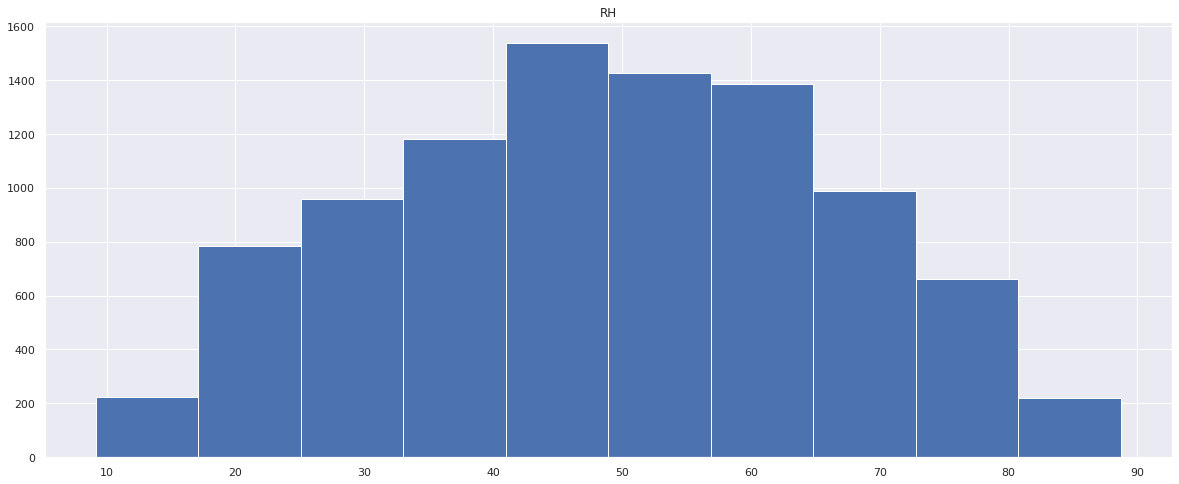

In [ ]:
df.hist()
plt.show()

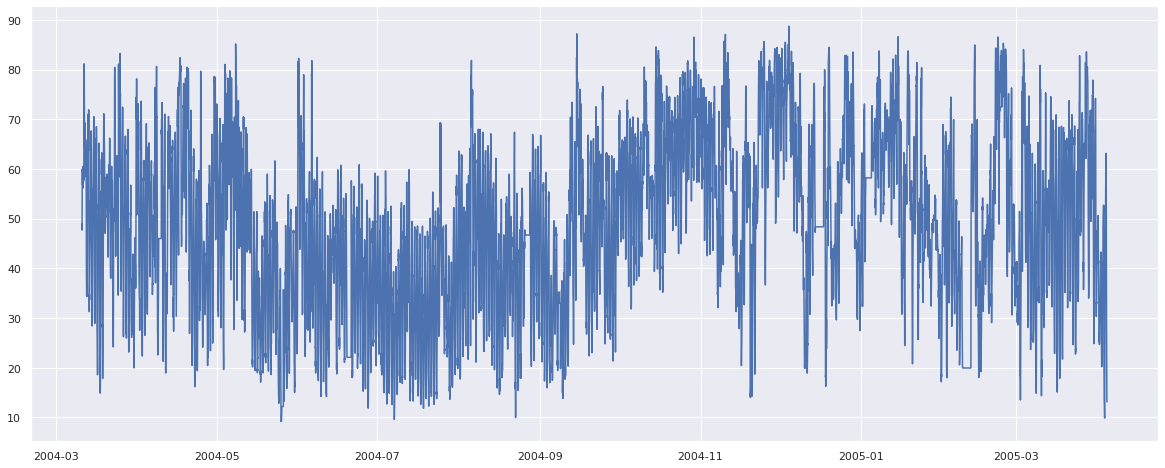

In [ ]:
plt.plot(df)
plt.show()

We can visually say by the above histogram that the data is stationary with bell curve but with slightly thick center. 

In [ ]:
X = df.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=42.649492, mean2=54.978895
variance1=255.156488, variance2=271.127145


Mean and variance are not extremely different.

In [ ]:
from statsmodels.tsa.stattools import adfuller
X = df.iloc[:,0].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.317409
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


By observing the histogram we can say that the data is stationary with bell curve of slightly thick center.
Adf test further confirms that data is stationary as p-value = 0 ie < 0.05
<p> If the dataset was non-stationary we could have used log transformation on data and check.

### <b>Modelling</b>
<p> Here we will be converting data set into train and test set, then try to implement ARMA, ARIMA, SARIMA models and also plot predictions along with expected values.  

In [ ]:
test_size = 60
df_train = df[:-test_size]
df_test = df[-test_size:]

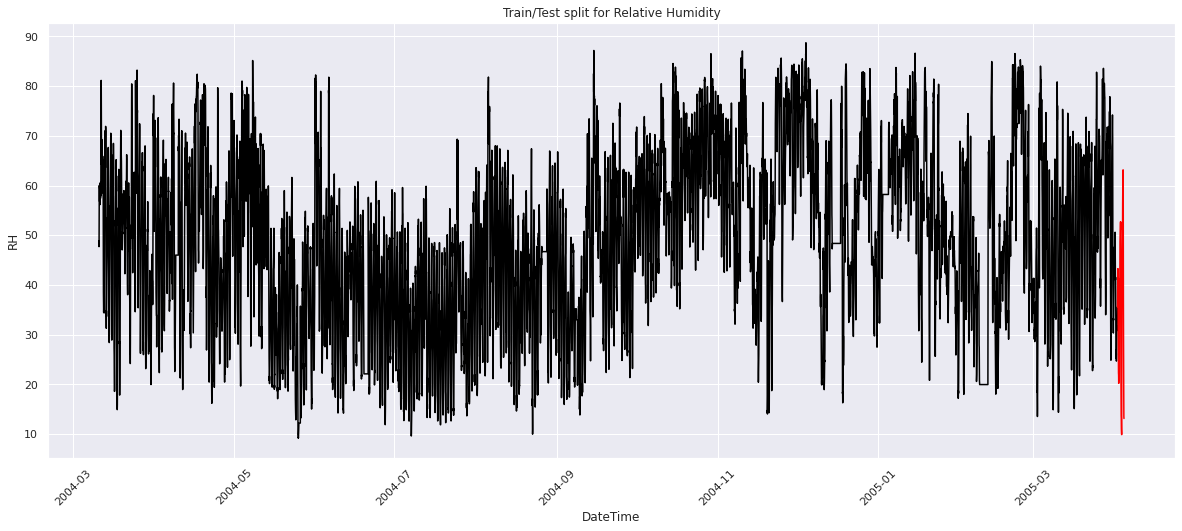

In [ ]:
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.ylabel('RH')
plt.xlabel('DateTime')
plt.xticks(rotation=45)
plt.title("Train/Test split for Relative Humidity")
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
y = df_train['RH']
ARMAmodel = SARIMAX(y, order = (1, 0, 1))
ARMAmodel = ARMAmodel.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [ ]:
y_pred = ARMAmodel.get_forecast(len(df_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df["Predictions"]

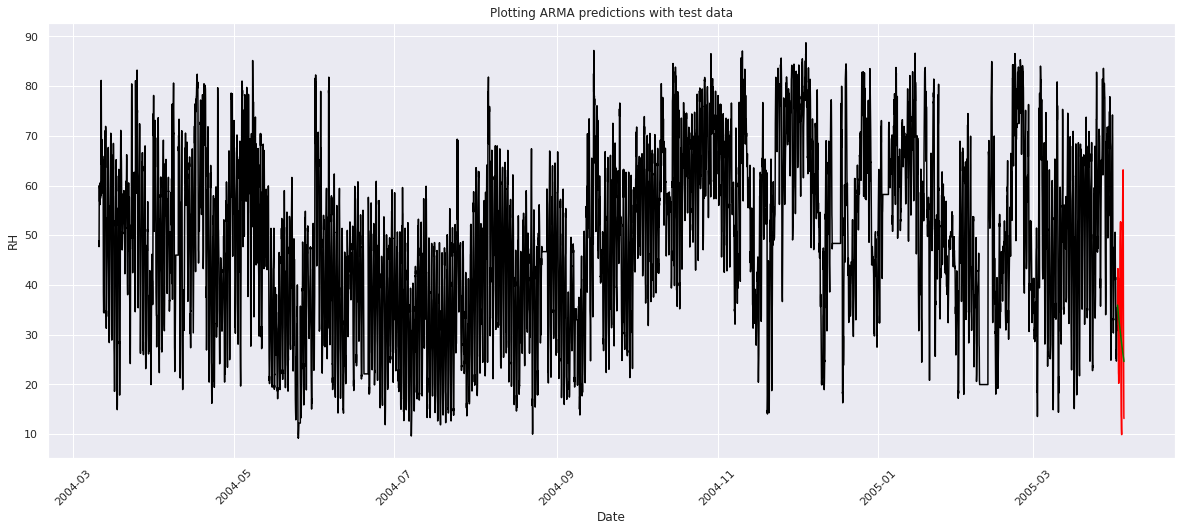

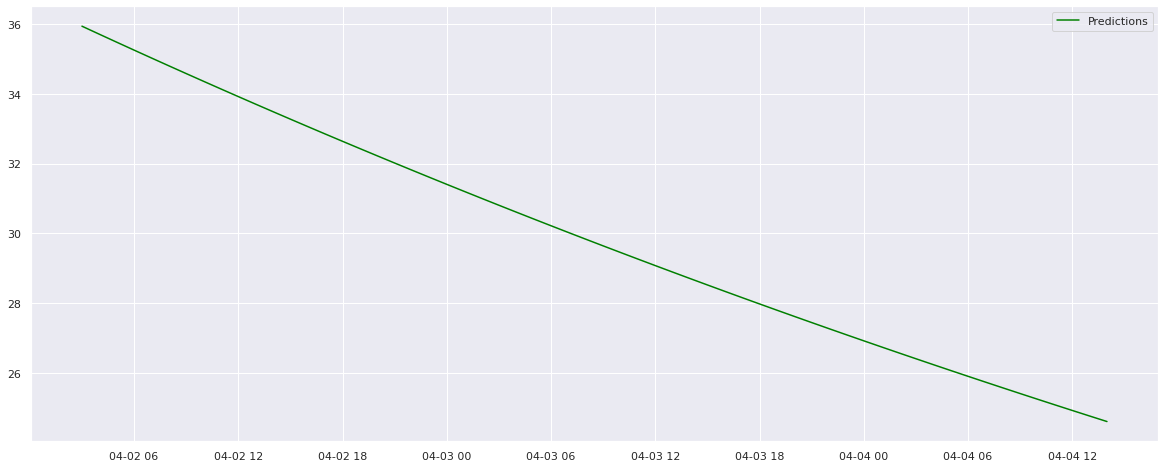

In [ ]:
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.ylabel('RH')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Plotting ARMA predictions with test data")
plt.show()
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.legend()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(df_test["RH"].values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)

RMSE:  16.420219043553878


In [ ]:
from statsmodels.tsa.arima_model import ARIMA

ARIMAmodel = ARIMA(y, order = (1, 0, 1))
ARIMAmodel = ARIMAmodel.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


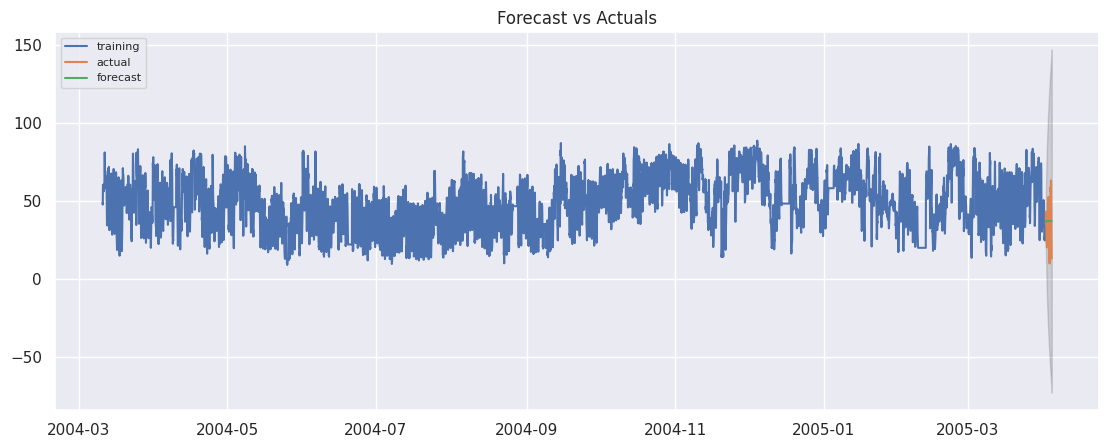

In [ ]:
# Build Model
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(train, order=(3,2,1))  
model = ARIMA(df_train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(60, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=df_test.index)
lower_series = pd.Series(conf[:, 0], index=df_test.index)
upper_series = pd.Series(conf[:, 1], index=df_test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_train, label='training')
plt.plot(df_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse = np.sqrt(mean_squared_error(df_test["RH"].values, fc_series))
print("RMSE: ",arima_rmse)

RMSE:  14.82707474632043


In [ ]:
SARIMAXmodel = SARIMAX(y, order = (3, 2, 1), seasonal_order=(2,2,2,12))
SARIMAXmodel = SARIMAXmodel.fit()

y_pred2 = SARIMAXmodel.get_forecast(len(df_test.index))
y_pred_df2 = y_pred2.conf_int(alpha = 0.05) 
y_pred_df2["Predictions"] = SARIMAXmodel.predict(start = y_pred_df2.index[0], end = y_pred_df2.index[-1])
y_pred_df2.index = df_test.index
y_pred_out2 = y_pred_df2["Predictions"] 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


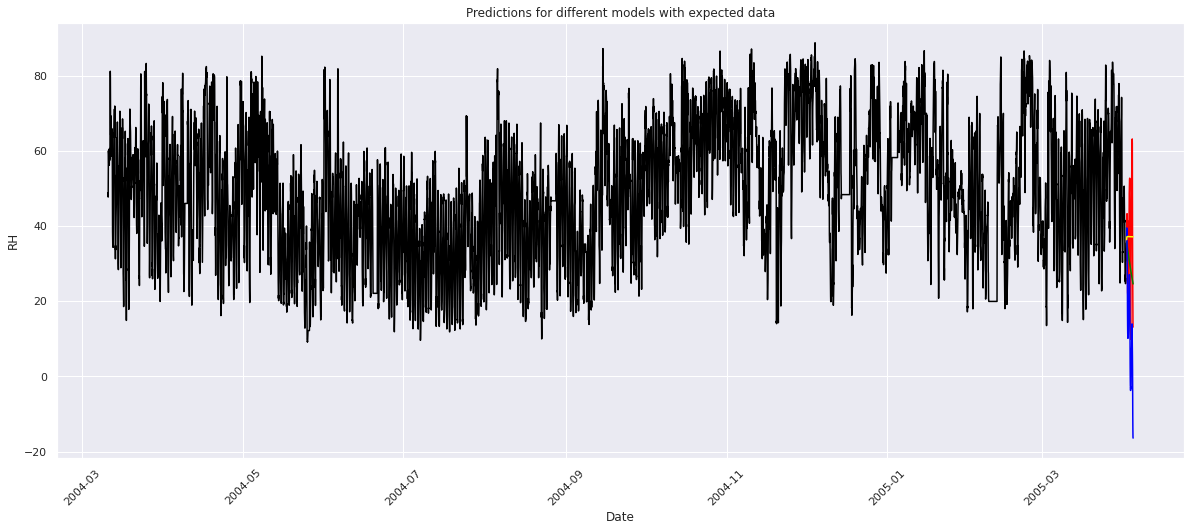

No handles with labels found to put in legend.


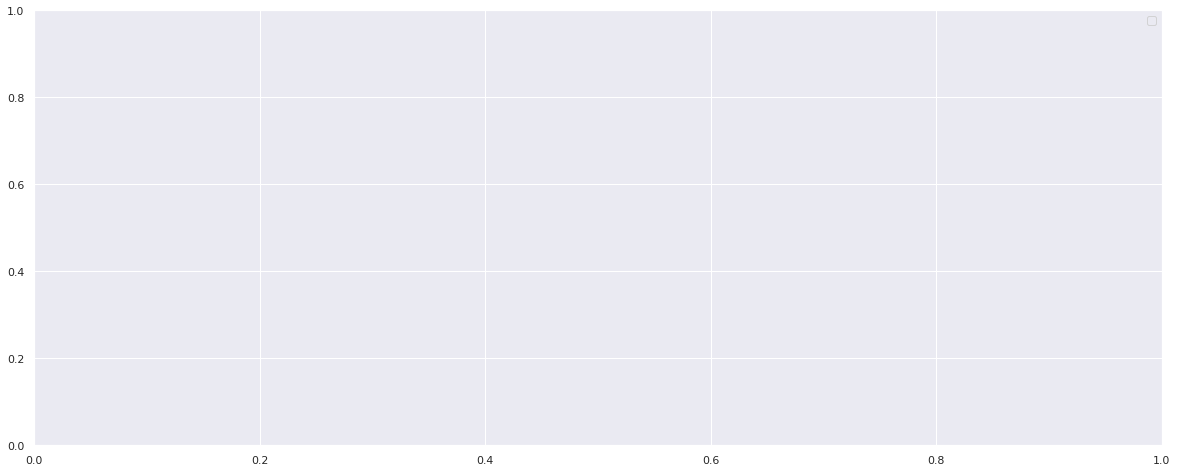

In [ ]:
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.plot(y_pred_out, color='green', label = 'Predictions')
plt.plot(y_pred_out2, color='Blue', label = 'SARIMA Predictions')
plt.plot(fc_series, color='Yellow', label = 'SARIMA Predictions')

plt.ylabel('RH')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Predictions for different models with expected data")
plt.show()

plt.legend()

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
sarima_mse = mean_squared_error(df_test["RH"].values, y_pred_df2["Predictions"])
rmse = sqrt(sarima_mse)
print("RMSE: ",rmse)

RMSE:  27.419025209065552


### <b> Conclusion </b>and <b>Future use cases</b>
After trying different time series models namely ARMA, ARIMA and SARIMA we may conclude by presenting above plots that ARIMA model is the most useful one in our case.
<p> This model can be used to predict Relative humidity in italian city at different time of the year for research purposes.</p>
<p> Evidences of cross-sensitivities as well as both concept and sensor drifts are present eventually affecting sensors concentration estimation capabilities.
Thus we will require more exact readings which includes above factors at the time of reading for more accurate predictions.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py

In [ ]:
from colab_pdf import colab_pdf
colab_pdf('TimeSeriesProject_IBM.ipynb')